# Metric Design 

In this exercice we are going get a first glimpse on Olist's business health

In [113]:
#load modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
#load data
from olist.data import Olist
data = Olist().get_data()
orders = data['orders']
sellers = data['sellers']
products = data['products']
items = data['order_items']
reviews = data['order_reviews']

## 1 - Orders vs. Reviews?

___
❓Plot a histogram of `review_score`. How many valid reviews do we have in total?

In [115]:
data["order_reviews"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


/home/florent/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


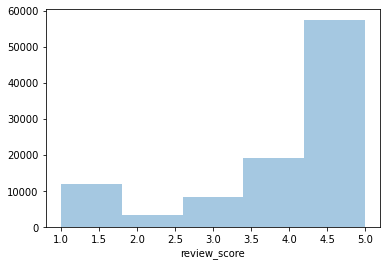

In [116]:
sns.distplot(data["order_reviews"]["review_score"], bins = 5, kde = False);

___
❓ Plot a histogram of `order_status`
- We already know from our data schema that each `review` has a unique `order`.
- Do all `orders` have a `review`?

<details>
    <summary>Hint</summary>

You can use `pd.Series.isna().sum()` to count the number of NaN values in a series
</details>

In [117]:
data["order_reviews"]["order_id"].isna().sum()

0

<AxesSubplot:xlabel='order_status', ylabel='Count'>

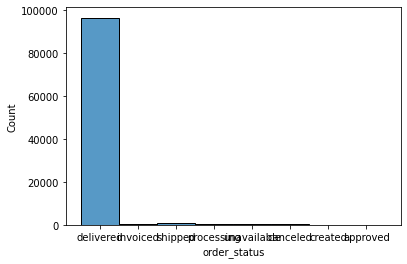

In [118]:
status_count = data["orders"][["order_id", "order_status"]].groupby(by = "order_status").count()
status_count
sns.histplot(data["orders"]['order_status'])

☝️ The Olist Dataset seems to have already been filtered to only contain orders with review.

## 2 - Evolution of key business metrics over the past 14 months

- Which metric would you use as key business output metric of Olist? 
- Which metric would you use to measure that a customer had a good experience with Olist? 
- Which metric would you use to measure shipping delay?
- For each metric, plot a trend line over time.

### Metric 1: Order numbers

❓First, plot numbers of weekly total orders (to check how is the business going)  
Then, plot also the weekly number of non-delivered orders (to check if no issue is visible)
<details>
    <summary>Hint</summary>
    
    
Make sure to convert dates to python `datetime` objects  
Make use of pandas's native handling of `datetime` objects, using `pandas.Series.resample()`
</details>

In [150]:
import time 
import datetime

In [151]:
data["orders"]["order_purchase_timestamp"] = pd.to_datetime(data["orders"]["order_purchase_timestamp"])
data["orders"]["year-week"] = data["orders"]["order_purchase_timestamp"].dt.strftime("%Y-%V")
data["orders"]["year-month"] = data["orders"]["order_purchase_timestamp"].dt.strftime("%Y-%m")
data["orders"].sort_values(by="year-month")
data["orders"].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year-week,year-month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-40,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-30,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-32,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-46,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-07,2018-02


<AxesSubplot:xlabel='year-month', ylabel='Count'>

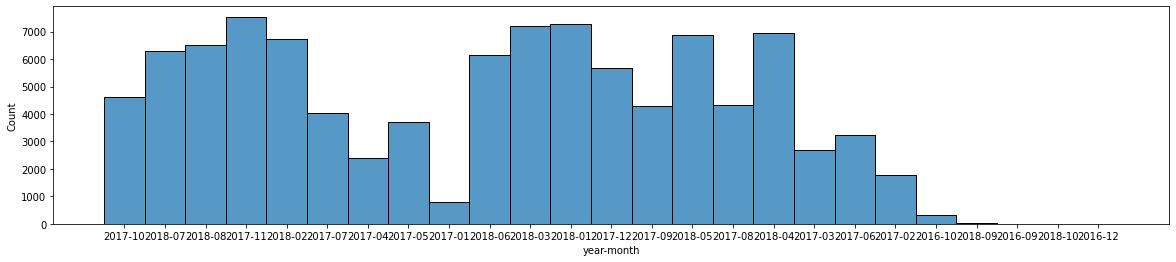

In [152]:
f, ax1 = plt.subplots(1, 1, figsize = (20,4))
sns.histplot(data["orders"]["year-month"], ax = ax1)

In [187]:
orders_followup = data["orders"][["order_id", "year-month"]].groupby( by = "year-month").count() 
orders_followup.rename(columns = {"order_id":"order_count"})

,order_count
year-month,
2016-09,4
2016-10,324
2016-12,1
2017-01,800
2017-02,1780
2017-03,2682
2017-04,2404
2017-05,3700
2017-06,3245


### Metric 1-bis (optional): Total payment values
❓Instead of a number of orders, look at the weekly sum of `payment_value` in `BRL` to get a proxy of Olist's weekly revenues

In [172]:
data["order_payments"].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Metric 2: Customer Satisfaction
❓Plot monthly customer satisfaction, as mean review_score

### Metric 3: Shipping delay

❓Create a two new metrics `delay_vs_expected` and `wait_time` in **days**, from the `orders` dataset, and plot their historical evolution in weekly means to check for any noticeable trends

<details>
    <summary>Hint</summary>

    
Ask StackOverflow to help you compute differences between two `datetime` in python!
</details>